<a href="https://www.kaggle.com/code/samarchhetri/home-loan-approval?scriptVersionId=121106229" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/home-loan-approval/loan_sanction_test.csv
/kaggle/input/home-loan-approval/loan_sanction_train.csv


In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For pre-processing
from sklearn.preprocessing import StandardScaler, LabelEncoder, OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer, KNNImputer

# For model creation
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [3]:
# Load Dataset
loan_data = pd.read_csv('/kaggle/input/home-loan-approval/loan_sanction_train.csv')
loan_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
# Description of the dataset
loan_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
loan_data.info()
# We have 4 features of float type
# We have 1 feature of integer type
# We have 8 features of object type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


### Exploratory Data Analysis

In [6]:
loan_data.shape

(614, 13)

In [7]:
# Checking for duplicates
loan_data.duplicated().sum()

0

In [8]:
# Checking for missing values
loan_data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
loan_data.select_dtypes('object').columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')

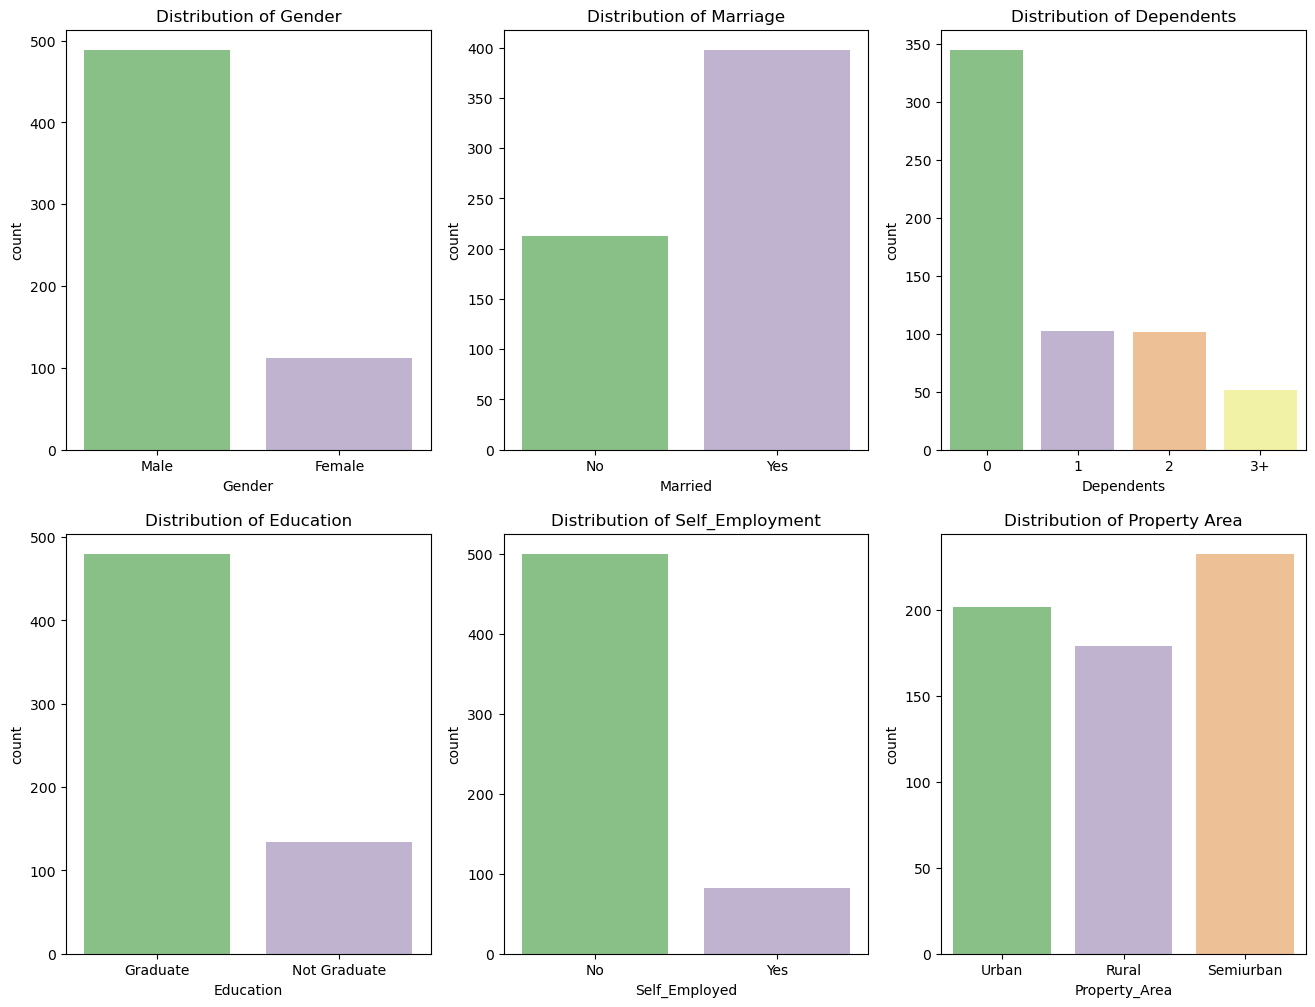

In [10]:
# Performing Univariate Analysis
plt.figure(figsize=(16,12))

plt.subplot(2,3,1)
sns.countplot(x=loan_data['Gender'], palette='Accent')
plt.title('Distribution of Gender')

plt.subplot(2,3,2)
sns.countplot(x=loan_data['Married'], palette='Accent')
plt.title('Distribution of Marriage')

plt.subplot(2,3,3)
sns.countplot(x=loan_data['Dependents'], palette='Accent')
plt.title('Distribution of Dependents')

plt.subplot(2,3,4)
sns.countplot(x=loan_data['Education'], palette='Accent')
plt.title('Distribution of Education')

plt.subplot(2,3,5)
sns.countplot(x=loan_data['Self_Employed'], palette='Accent')
plt.title('Distribution of Self_Employment')

plt.subplot(2,3,6)
sns.countplot(x=loan_data['Property_Area'], palette='Accent')
plt.title('Distribution of Property Area')

plt.show()

In [11]:
loan_data['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

##### As can be seen, the 'Gender' column is clearly dominated by Male category, 'Married' column by Yes, 'Dependents' column by 0, 'Education' by Graduate, 'Self-Employed' by No.  But, the distribution of categories on 'Property-Area' column seems almost equal.

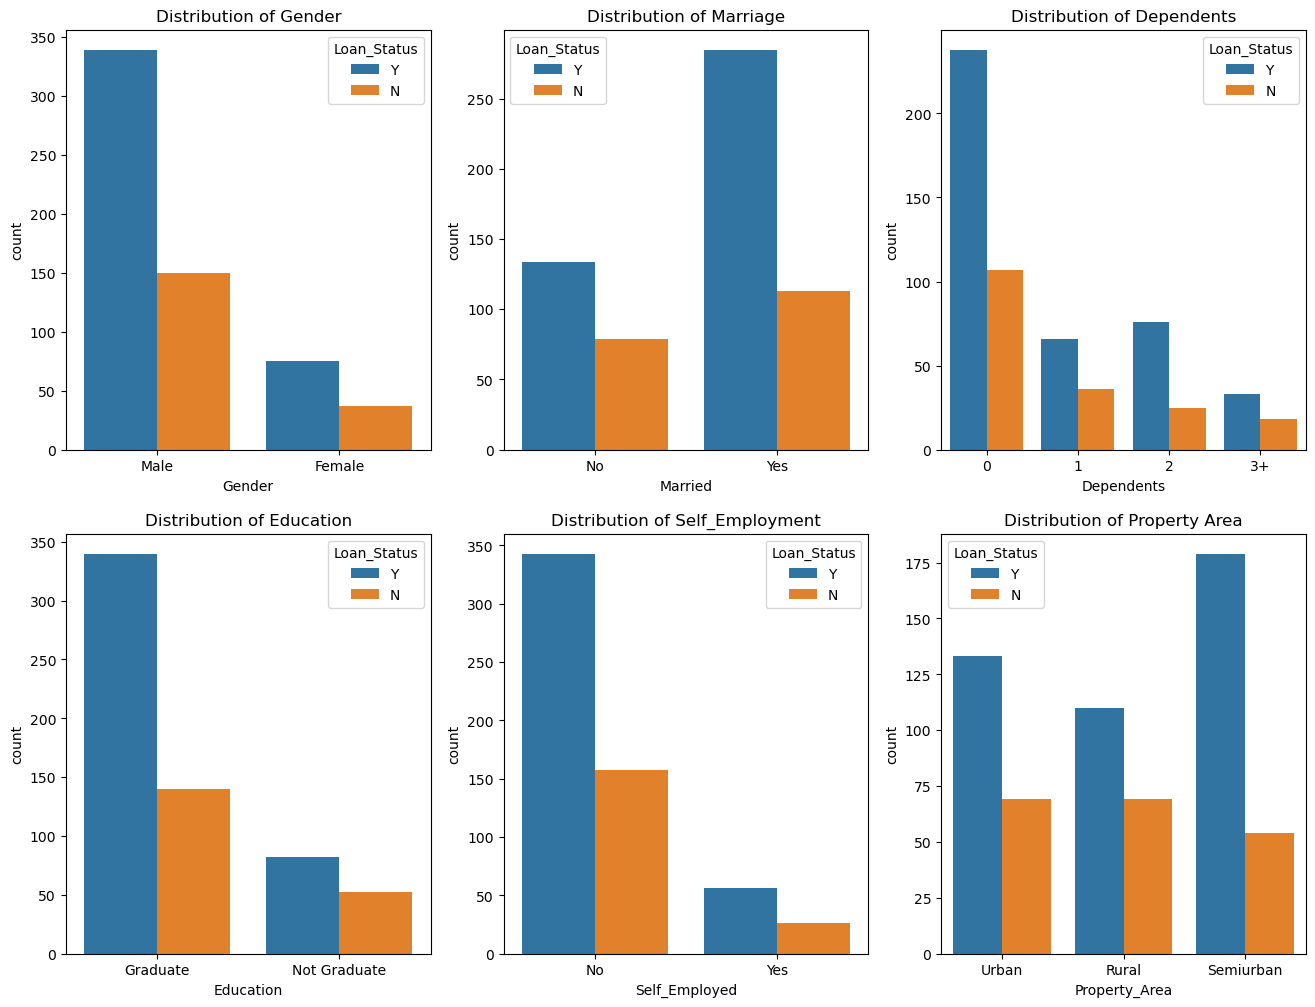

In [12]:
# Relation of input features with target feature
plt.figure(figsize=(16,12))

plt.subplot(2,3,1)
sns.countplot(x=loan_data['Gender'], hue=loan_data['Loan_Status'])
plt.title('Distribution of Gender')

plt.subplot(2,3,2)
sns.countplot(x=loan_data['Married'],hue=loan_data['Loan_Status'])
plt.title('Distribution of Marriage')

plt.subplot(2,3,3)
sns.countplot(x=loan_data['Dependents'], hue=loan_data['Loan_Status'])
plt.title('Distribution of Dependents')

plt.subplot(2,3,4)
sns.countplot(x=loan_data['Education'], hue=loan_data['Loan_Status'])
plt.title('Distribution of Education')

plt.subplot(2,3,5)
sns.countplot(x=loan_data['Self_Employed'], hue=loan_data['Loan_Status'])
plt.title('Distribution of Self_Employment')

plt.subplot(2,3,6)
sns.countplot(x=loan_data['Property_Area'],hue=loan_data['Loan_Status'])
plt.title('Distribution of Property Area')

plt.show()

In [13]:
# Numerical features
loan_data.select_dtypes(exclude='object').columns


Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

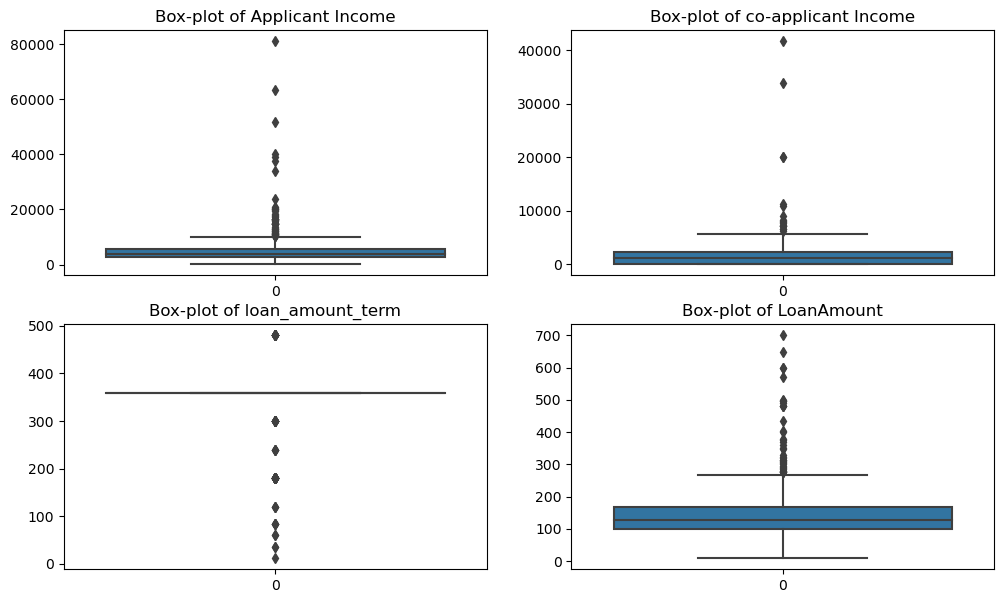

In [14]:
# Box-plot 
plt.figure(figsize=(12,7))

plt.subplot(2,2,1)
sns.boxplot(loan_data['ApplicantIncome'])
plt.title('Box-plot of Applicant Income')

plt.subplot(2,2,2)
sns.boxplot(loan_data['CoapplicantIncome'])
plt.title('Box-plot of co-applicant Income')

plt.subplot(2,2,3)
sns.boxplot(loan_data['Loan_Amount_Term'])
plt.title('Box-plot of loan_amount_term')

plt.subplot(2,2,4)
sns.boxplot(loan_data['LoanAmount'])
plt.title('Box-plot of LoanAmount')
plt.show()


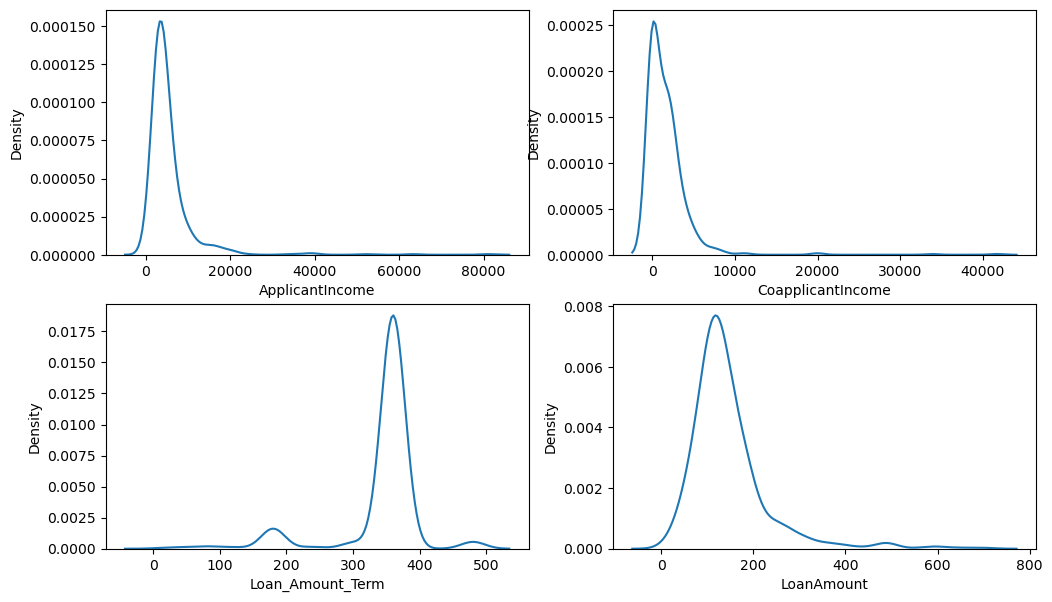

In [15]:
# KDE Plot 
plt.figure(figsize=(12,7))

plt.subplot(2,2,1)
sns.kdeplot(loan_data['ApplicantIncome'])

plt.subplot(2,2,2)
sns.kdeplot(loan_data['CoapplicantIncome'])

plt.subplot(2,2,3)
sns.kdeplot(loan_data['Loan_Amount_Term'])

plt.subplot(2,2,4)
sns.kdeplot(loan_data['LoanAmount'])
plt.show()

##### As can be seen, the 'Applicant Income', 'Co-applicant Income', 'Loan Amount' are right-skewed ,whereas, 'Loan Amount Term' is left-skewed distribution. So, we will try to change them to Gaussian.

In [16]:
# Distribution of target varaible
loan_data['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [17]:
# Assigning the input features and output feature to x and y respectively
x = loan_data.drop(columns=['Loan_ID', 'Loan_Status'])
y = loan_data['Loan_Status']

# We are not taking 'Loan Id' in our input feature

In [18]:
# Data Partitioning
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.1, random_state=10)

### Feature Engineering / Pre-processing

In [19]:
X_train.head(3)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
549,Male,Yes,0,Graduate,No,2785,2016.0,110.0,360.0,1.0,Rural
190,Male,No,0,Not Graduate,No,4885,0.0,48.0,360.0,1.0,Rural
375,Male,Yes,0,Graduate,No,4817,923.0,120.0,180.0,1.0,Urban


In [20]:
X_train.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
549,Male,Yes,0,Graduate,No,2785,2016.0,110.0,360.0,1.0,Rural
190,Male,No,0,Not Graduate,No,4885,0.0,48.0,360.0,1.0,Rural


In [21]:
# Column Transfomer 1
# Imputing missing values

trnf_1 = ColumnTransformer([
    ('si', SimpleImputer(strategy='most_frequent'), [0,1,2,4,9])
], remainder='passthrough')

In [22]:
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import FunctionTransformer

In [23]:
# Column Transformer 2
# Applying function transformer 

trnf_2 = ColumnTransformer([
    ('func_trans', PowerTransformer(method='yeo-johnson'), [6,8]),
    ('yeo_johnson', PowerTransformer(method='yeo-johnson'), [7]),
    ('func_trns_sq', FunctionTransformer(lambda x: x**2), [9])
], remainder='passthrough')

In [24]:
loan_data['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [25]:
# Column trnasformer 3 
# Encoding categorical data

trnf_3 = ColumnTransformer([
    ('oe', OrdinalEncoder(categories=[['0','1','2','3+']]), [6]),
    ('ohe', OneHotEncoder(drop='first', sparse=False, handle_unknown='ignore'), [4,5,7,9,10])
], remainder='passthrough')

In [26]:
from sklearn.preprocessing import MinMaxScaler

In [27]:
trnf_4 = ColumnTransformer([
    ('mms', MinMaxScaler() , slice(0,12))
], remainder='passthrough')

In [28]:
# KNN Imputation 
trnf_5 = ColumnTransformer([
    ('knn_impute', KNNImputer(), slice(0,12))
])

In [29]:
# Creation of pipeline
pipeline = Pipeline([
    ('tf1', trnf_1),
    ('tf2', trnf_2),
    ('tf3', trnf_3),
    ('tf4', trnf_4),
    ('tf5', trnf_5)
])

In [30]:
# Fit the input set to pipeline
X_train_new = pipeline.fit_transform(X_train)
X_test_new = pipeline.transform(X_test)

In [31]:
# Encoding the target variable
label_encode = LabelEncoder()

# Fit target variable
y_train_new = label_encode.fit_transform(y_train)
y_test_new = label_encode.transform(y_test)

In [32]:
y_train.value_counts()/len(y_train)*100

Y    68.478261
N    31.521739
Name: Loan_Status, dtype: float64

In [33]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=10)

X_train_final, y_train_final = smote.fit_resample(X_train_new,y_train_new)

In [34]:
X_train_final.shape

(756, 12)

In [35]:
# Applying logisitc regression
log_reg = LogisticRegression()

log_reg.fit(X_train_final, y_train_final)

LogisticRegression()

In [36]:
# Applying cross validation
cross_val_score(log_reg, X_train_final, y_train_final, cv=5, scoring='accuracy').mean()

0.7221854304635762

In [37]:
y_train_pred = log_reg.predict(X_train_final)

In [38]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision_score(y_train_final, y_train_pred)

0.6741344195519349

In [39]:
recall_score(y_train_final, y_train_pred)

0.8756613756613757

In [40]:
f1_score(y_train_final, y_train_pred)

0.761795166858458

In [41]:
# Predicting test set
y_test_pred = log_reg.predict(X_test_new)

In [42]:
f1_score(y_test_new, y_test_pred)

0.8131868131868133

#### As can be seen, our model has got a performance of more than 85%

In [43]:
# Load test dataset
test_dataset = pd.read_csv('/kaggle/input/home-loan-approval/loan_sanction_test.csv')
test_dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [44]:
x.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural


In [45]:
test_dataset.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban


In [46]:
# Drop 'Loan_ID'
test_dataset.drop(columns=['Loan_ID'], inplace=True)

In [47]:
# Fitting to Pipeline
test_dataset_new = pipeline.transform(test_dataset)

In [48]:
# Predict the output
test_dataset_prediction = log_reg.predict(test_dataset_new)
test_dataset_prediction

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,

In [49]:
# Obtain Loan_Id so that we can merge it with our output
prediction = pd.read_csv('/kaggle/input/home-loan-approval/loan_sanction_test.csv', usecols=['Loan_ID'])

In [50]:
# Adding new column for our result
prediction['Results']= test_dataset_prediction

In [51]:
# Prediction of loan approval 
# 1 means 'Approved' 0 means 'Not Approved'
prediction

,Loan_ID,Results
0,LP001015,1
1,LP001022,1
2,LP001031,1
3,LP001035,1
4,LP001051,1
...,...,...
362,LP002971,1
363,LP002975,1
364,LP002980,1
365,LP002986,1
